# Read/Organize Data
#### Pandas

In [1]:
import pandas as pd
from pollutant_func import max_all_sites

In [2]:
pollutants = ['co','no2','ozone','pb','pm2_5','pm10','so2'] #for reading files


#make one DF that holds ALL the data. (takes ~2 minutes)
    
all_pollutants_df = pd.concat([max_all_sites(pd.read_csv('Data/All_CA_2017_%s.csv'%p,index_col=0)) for p in pollutants],
                           axis = 1, keys=pollutants)

In [3]:
all_pollutants_df.head()

co                                                        \
           Alameda Butte Contra Costa Fresno Humboldt Imperial Inyo Kern   
2017-01-01     0.6   0.4          0.6    0.4      0.6      0.2  0.1  0.4   
2017-01-02     0.6   0.2          0.5    0.5      0.6      1.1  0.1  0.5   
2017-01-03     0.7   0.2          0.5    0.4      0.7      1.4  0.1  0.6   
2017-01-04     0.7   0.4          0.4    0.3      0.7      0.7  0.1  0.6   
2017-01-05     0.9   0.4          0.6    0.3      0.7      0.7  0.1  0.5   

                               ...           so2                              \
           Los Angeles Madera  ...   Los Angeles Orange Riverside Sacramento   
2017-01-01         2.4    NaN  ...           1.7    0.5         0        NaN   
2017-01-02         0.9    NaN  ...           1.4    0.2       0.1        NaN   
2017-01-03         1.5    NaN  ...           2.6    0.5       0.8        NaN   
2017-01-04         1.8    NaN  ...           3.1    0.8       0.8        NaN   
2017-01-05         0.7    NaN  ...           1.2    0.2       0.5        NaN   

                                                                               \
           San Bernardino San Diego San Luis Obispo Santa Barbara Santa Clara   
2017-01-01            0.6       0.1               0             3         0.3   
2017-01-02            0.7       0.1               0             3         0.1   
2017-01-03            0.6       0.2               0             2         0.1   
2017-01-04            0.7       0.2               0             2         0.1   
2017-01-05            1.9         0               0             1         0.3   

                   
           Solano  
2017-01-01    0.8  
2017-01-02    1.6  
2017-01-03    1.1  
2017-01-04    1.7  
2017-01-05    1.4  

[5 rows x 233 columns]

# Plot
#### Matplotlib
Plot over time the pollutants we want to inspect for a given county

In [4]:
from pollutant_func import county_pollutants,plot_pollutants

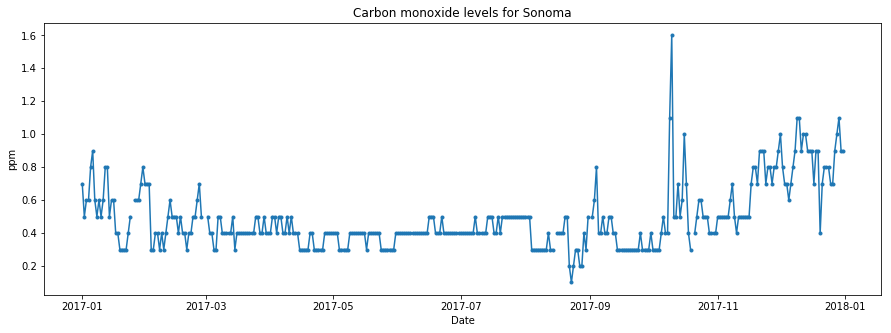

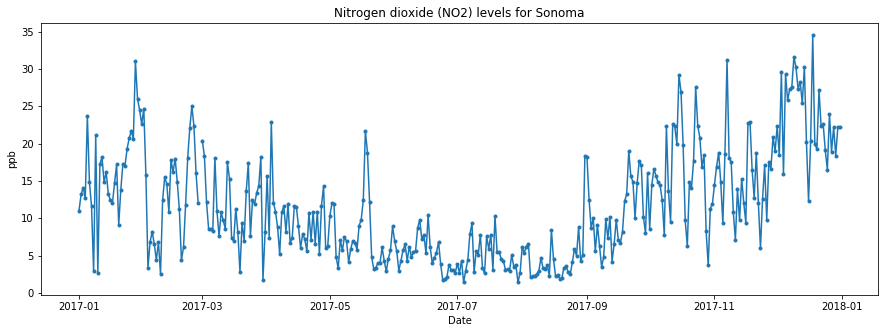

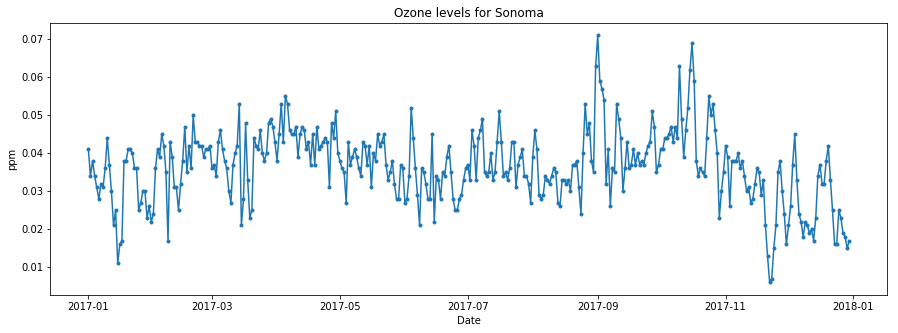

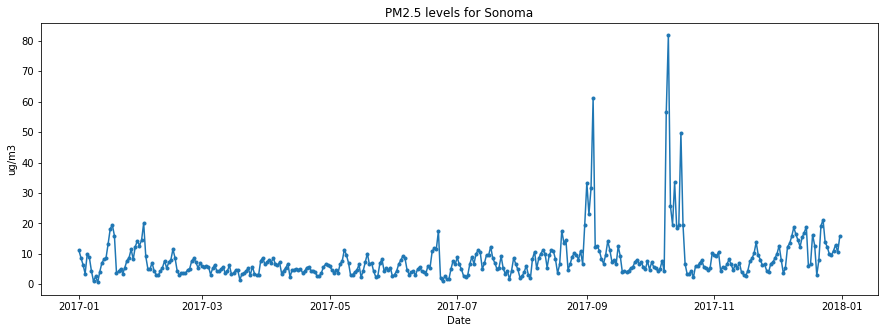

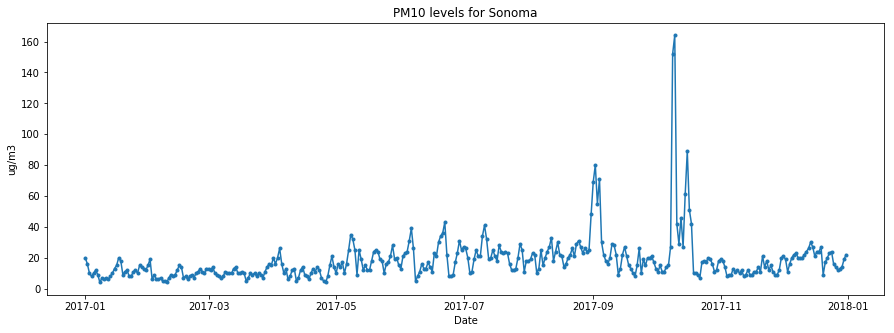

In [15]:

from matplotlib import pyplot as plt

pollutants = ['co','no2','ozone','pb','pm2_5','pm10','so2'] #if there is no data for one, it gets ignored

county = 'Sonoma'
plot_pollutants(county,all_pollutants_df,pollutants)

#may need to run this cell twice to get the plots to show

# Test for Outliers
Find outliers for each pollutant in a given county. If found, print the date they occured.

In [6]:
from pollutant_func import outlier_dates,county_pollutants

In [7]:
outlier_dates('Sonoma',.00005,all_pollutants_df,pollutants)

The Sonoma PM2.5 outlier occured on 2017-10-10
The Sonoma PM10 outlier occured on 2017-10-10


Northern California Wildfires occured from Oct6-Oct16; some outliers fall into this date range

# Tests of Independence
#### 2 Sample T-Tests using SciPy

In [8]:
#histograms
import seaborn as sns

/anaconda3/envs/python3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


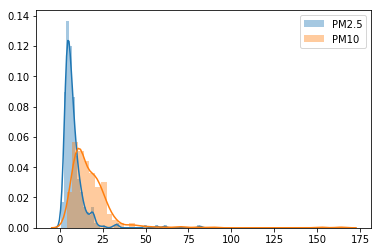

In [9]:
county_pollutants_df = county_pollutants('Sonoma',all_pollutants_df,pollutants)
sns.distplot(list(county_pollutants_df['pm2_5'].dropna()), label='PM2.5')
sns.distplot(list(county_pollutants_df['pm10'].dropna()), label='PM10')
plt.legend();

In [10]:
import scipy

In [11]:
t, p = scipy.stats.ttest_ind(list(county_pollutants_df['pm2_5'].dropna()),
                             list(county_pollutants_df['pm10'].dropna()),
                             equal_var=False)
print("ttest_ind: t = %g, p = %g" % (t, p))

ttest_ind: t = -11.4508, p = 2.53521e-27


# County Map  
#### Bokeh
Given pollutant and date, plot a map to compare counties

Run the following cell if you dont have US County Data from Bokeh SampleData

In [12]:
#import bokeh
#bokeh.sampledata.download()

In [13]:
from pollutant_func import plot_map

In [14]:
plot_map('pm2_5','2017-10-10',all_pollutants_df)